---
# Benchmarking - 3D CUBE 
---

In [1]:
from benchmark_main import *

2021-12-31 12:26:19.560556: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 12:26:19.560907: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# FILE INPUT
+ precalculated network distances 

In [2]:
organism = 'cube' 
net_sizes = [125, 512, 1000, 5832, 10648, 21952]

In [3]:
b_file100 = open('netdist_precalc/dist_network_125_cube.pkl', "rb")
dist_network100 = pickle.load(b_file100)
print('100 done')

b_file500 = open('netdist_precalc/dist_network_512_cube.pkl', "rb")
dist_network500 = pickle.load(b_file500)
print('500 done')

100 done
500 done


In [4]:
b_file1k = open('netdist_precalc/dist_network_1000_cube.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

1000 done


In [5]:
b_file5k = open('netdist_precalc/dist_network_5832_cube.pkl', "rb")
dist_network5k = pickle.load(b_file5k)
print('5000 done')

5000 done


In [31]:
b_file1_10k = open('netdist_precalc/dist_network_10648_cube_first.pkl', "rb")
part1_10k = pickle.load(b_file1_10k)

b_file2_10k = open('netdist_precalc/dist_network_10648_cube_second.pkl', "rb")
part2_10k = pickle.load(b_file2_10k)

b_file3_10k = open('netdist_precalc/dist_network_10648_cube_third.pkl', "rb")
part3_10k = pickle.load(b_file3_10k)

b_file4_10k = open('netdist_precalc/dist_network_10648_cube_fourth.pkl', "rb")
part4_10k = pickle.load(b_file4_10k)

b_file5_10k = open('netdist_precalc/dist_network_10648_cube_fifth.pkl', "rb")
part5_10k = pickle.load(b_file5_10k)

b_file6_10k = open('netdist_precalc/dist_network_10648_cube_sixth.pkl', "rb")
part6_10k = pickle.load(b_file6_10k)

b_file7_10k = open('netdist_precalc/dist_network_10648_cube_seventh.pkl', "rb")
part7_10k = pickle.load(b_file7_10k)

dist_network10k = {
    **part1_10k,
    **part2_10k,
    **part3_10k,
    **part4_10k,
    **part5_10k,
    **part6_10k,
    **part7_10k
}
print('10k done')

10k done


In [3]:
b_file1_20k = open('netdist_precalc/dist_network_21952_cube_part1.pkl', "rb")
part1_20k = pickle.load(b_file1_20k)

b_file2_20k = open('netdist_precalc/dist_network_21952_cube_part2.pkl', "rb")
part2_20k = pickle.load(b_file2_20k)

b_file3_20k = open('netdist_precalc/dist_network_21952_cube_part3.pkl', "rb")
part3_20k = pickle.load(b_file3_20k)

b_file4_20k = open('netdist_precalc/dist_network_21952_cube_part4.pkl', "rb")
part4_20k = pickle.load(b_file4_20k)

dist_network20k = {
    **part1_20k,
    **part2_20k,
    **part3_20k,
    **part4_20k
}
print('20k done')

20k done


# GLOBAL LAYOUT 

In [12]:
# 3D CUBE 
organism = 'cubegrid'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameters (post - testing)
n_neighbors = 10 #8
spread = 1 #1
min_dist = 0.9 #0.0
metric = 'cosine'
lnr = 1
nep = None

In [13]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network100, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:02
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.99043050095587


In [15]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network500, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:02
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9975834865840914


In [16]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:12
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9948800953317772


In [ ]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network5k, dist_global)
print('RWR corr coef: ',r_global)

In [21]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network10k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:06:15
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9932502160866419


In [ ]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network20k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network20k, dist_global)
print('RWR corr coef: ',r_global)

In [3]:
# pearson correlation coefficient 

d_netsize_corr_global = {(5,5,5):0.991,
                           (8,8,8):0.999,
                           (10,10,10):0.994,
                           (18,18,18):0.996,
                            (22,22,22):0.993, 
                            (28,28,28):0.997
                           }

# time in seconds 

d_netsize_time = {
                           (5,5,5):1,
                           (8,8,8):3,
                           (10,10,10):13,
                           (18,18,18):57,
                           (22,22,22):375, #6min 15s
                           (28,28,28):991 #16min 30s
                          }

# NODE2VEC

In [7]:
# 3D CUBE 
organism = 'cubegrid'

feature = 'nodevec'

# parameters (post - testing)
n_neighbors = 20 #8
spread = 1 #1
min_dist = 0.0 #0.0
metric = 'cosine'
lnr = 1
nep = None

In [8]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network100.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network100, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:17
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9641007812414886


In [9]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network500.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network500, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:45
130816
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.976581911435791


In [10]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:01:30
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9774322005784412


In [35]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network5k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network5k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:02:18
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9740907098853382


In [37]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network10k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network10k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:05:24
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9844498271515664


In [5]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network20k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network20k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:17:27
10441233
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9842639539669642


In [18]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nodevec = {(5,5,5):0.965, #0.953,
                           (8,8,8):0.977,
                           (10,10,10):0.977,
                           (18,18,18):0.974,
                           (22,22,22):0.980,
                           (28,28,28):0.980
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nodevec = {          (5,5,5):17, #3,
                               (8,8,8):45, #12,
                               (10,10,10):90, #22,
                               (18,18,18):138, #2min 18s
                               (22,22,22):324, #5min 24s
                               (28,28,28):1087 #17min 47s
                               }

# FORCE-DIRECTED | NETWORKX
+ using the spring-layout

In [27]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=2400)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

SPRING
Execution Time: 00:00:02
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9963234590739624


In [30]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=75)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

SPRING
Execution Time: 00:00:03
130816
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9907381176560325


In [15]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=125)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:13
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
RWR corr coef:  0.9938767421225443


SPRING
Execution Time: 00:00:13
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.9864659797520252


In [5]:
print('Runtime spring for Corr. Coeff. 0.99')

G = nx.grid_graph([10,10,10],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=400)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.99
Execution Time: 00:00:44
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.9939791128279677


In [16]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=30)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:57
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
RWR corr coef:  0.994673861934273


SPRING
Execution Time: 00:00:49
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.5204283449194765


In [3]:
print('Runtime spring for Corr. Coeff. 0.99')

G = nx.grid_graph([18,18,18],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=2000)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.99
Execution Time: 01:00:00
SPRING corr coef:  0.9961185385037217


In [31]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=20)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('RWR corr coef: ',r_spring)

SPRING
Execution Time: 00:02:02
2572246
1k done
10k done
50k done
100k done
500k done
1mio done
2mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.7446373920023724


In [ ]:
print('Runtime spring for Corr. Coeff. 0.98')

G = nx.grid_graph([22,22,22],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=50000)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 50k >

Runtime spring for Corr. Coeff. 0.98


In [7]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)

print('spring')
start = time.time()
posG_spring = springlayout_3D(G,itr=45)
end = time.time()
m,s = exec_time(start,end)
print('spring done')

pairs=list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

spring
Execution Time: 00:16:11
spring done


#### CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [5]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nx = {(5,5,5):0.996,
                           (8,8,8):0.990,
                           (10,10,10):0.975,
                           (18,18,18):0.870,
                           (22,22,22):0.751,
                           (28,28,28):0.504
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nx = {          (5,5,5):2,
                               (8,8,8):3,
                               (10,10,10):44,
                               (18,18,18):3600,
                               (22,22,22):10000, # run again 
                               (28,28,28):43200 #12h cut off
                               }

# FORCE-DIRECTED | iGRAPH
+ https://igraph.org/python/doc/tutorial/visualisation.html
+ https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4
+ https://igraph.org/c/doc/igraph-Layout.html#igraph_layout_fruchterman_reingold_3d
+ using the fruchterman-reingold layout

In [9]:
import igraph as ig

In [93]:
print('Run for', d_netsize_time[(5,5,5)],'seconds')

#########
# 1 0 0 
#########

nxG = nx.grid_graph([5,5,5],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 20000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network100.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 1 seconds
SPRING - graph-tools
Execution Time: 00:00:01
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9994528495123299


In [11]:
print('Run for', d_netsize_time[(8,8,8)],'seconds')

#########
# 5 0 0 
#########

nxG = nx.grid_graph([8,8,8],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 4500)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 3 seconds
SPRING - igraph
Execution Time: 00:00:03
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9937013120885301


In [13]:
print('Run for', d_netsize_time[(10,10,10)],'seconds')

#########
# 1 0 0 0 
#########

nxG = nx.grid_graph([10,10,10],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 4000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 13 seconds
SPRING - igraph
Execution Time: 00:00:12
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.992747356542491


In [15]:
print('Run for', d_netsize_time[(18,18,18)],'seconds')

#########
# 5 0 0 0 
#########

nxG = nx.grid_graph([18,18,18],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=500)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 57 seconds
SPRING - igraph
Execution Time: 00:00:50
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9882726100681054


In [27]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(18,18,18)])

nxG = nx.grid_graph([18,18,18],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=2000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.996
SPRING - igraph
Execution Time: 00:03:31
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9916446657389857


In [24]:
print('Run for', d_netsize_time[(22,22,22)],'seconds')

#########
# 1 0 0 0 0 
#########

nxG = nx.grid_graph([22,22,22],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=950)
posG_spring = dict(zip(list(nxG.nodes()),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 375 seconds
SPRING - igraph
Execution Time: 00:05:18
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.990362100367329


In [25]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(22,22,22)])

nxG = nx.grid_graph([22,22,22],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=4000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.993
SPRING - igraph
Execution Time: 00:11:10
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9908750850961296


In [ ]:
print('Run for', d_netsize_time[(28,28,28)],'seconds')

#########
# 2 0 0 0 0 
#########

nxG = nx.grid_graph([28,28,28],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=580)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 580 > 0.939 > 15min 38s

In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(28,28,28)])

nxG = nx.grid_graph([28,28,28],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=5000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.997


In [6]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_ig = {       (5,5,5): 0.998,  
                            (8,8,8): 0.996,
                            (10,10,10): 0.997,
                            (18,18,18): 0.988,
                            (22,22,22): 0.984,
                            (28,28,28): 0.939,
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_ig = {          (5,5,5): 1,
                               (8,8,8): 3,
                               (10,10,10):13,
                               (18,18,18):211, #3min 31s ,
                               (22,22,22):670, #11min 10s,
                               (28,28,28):9360 #2h 36min 
                               }

# DIAGRAMS
+ comparing runtime and pearson corr. coeff. of global layout to three force-directed layout methods 

In [11]:
labelsize = 22
tick_size = 11.5

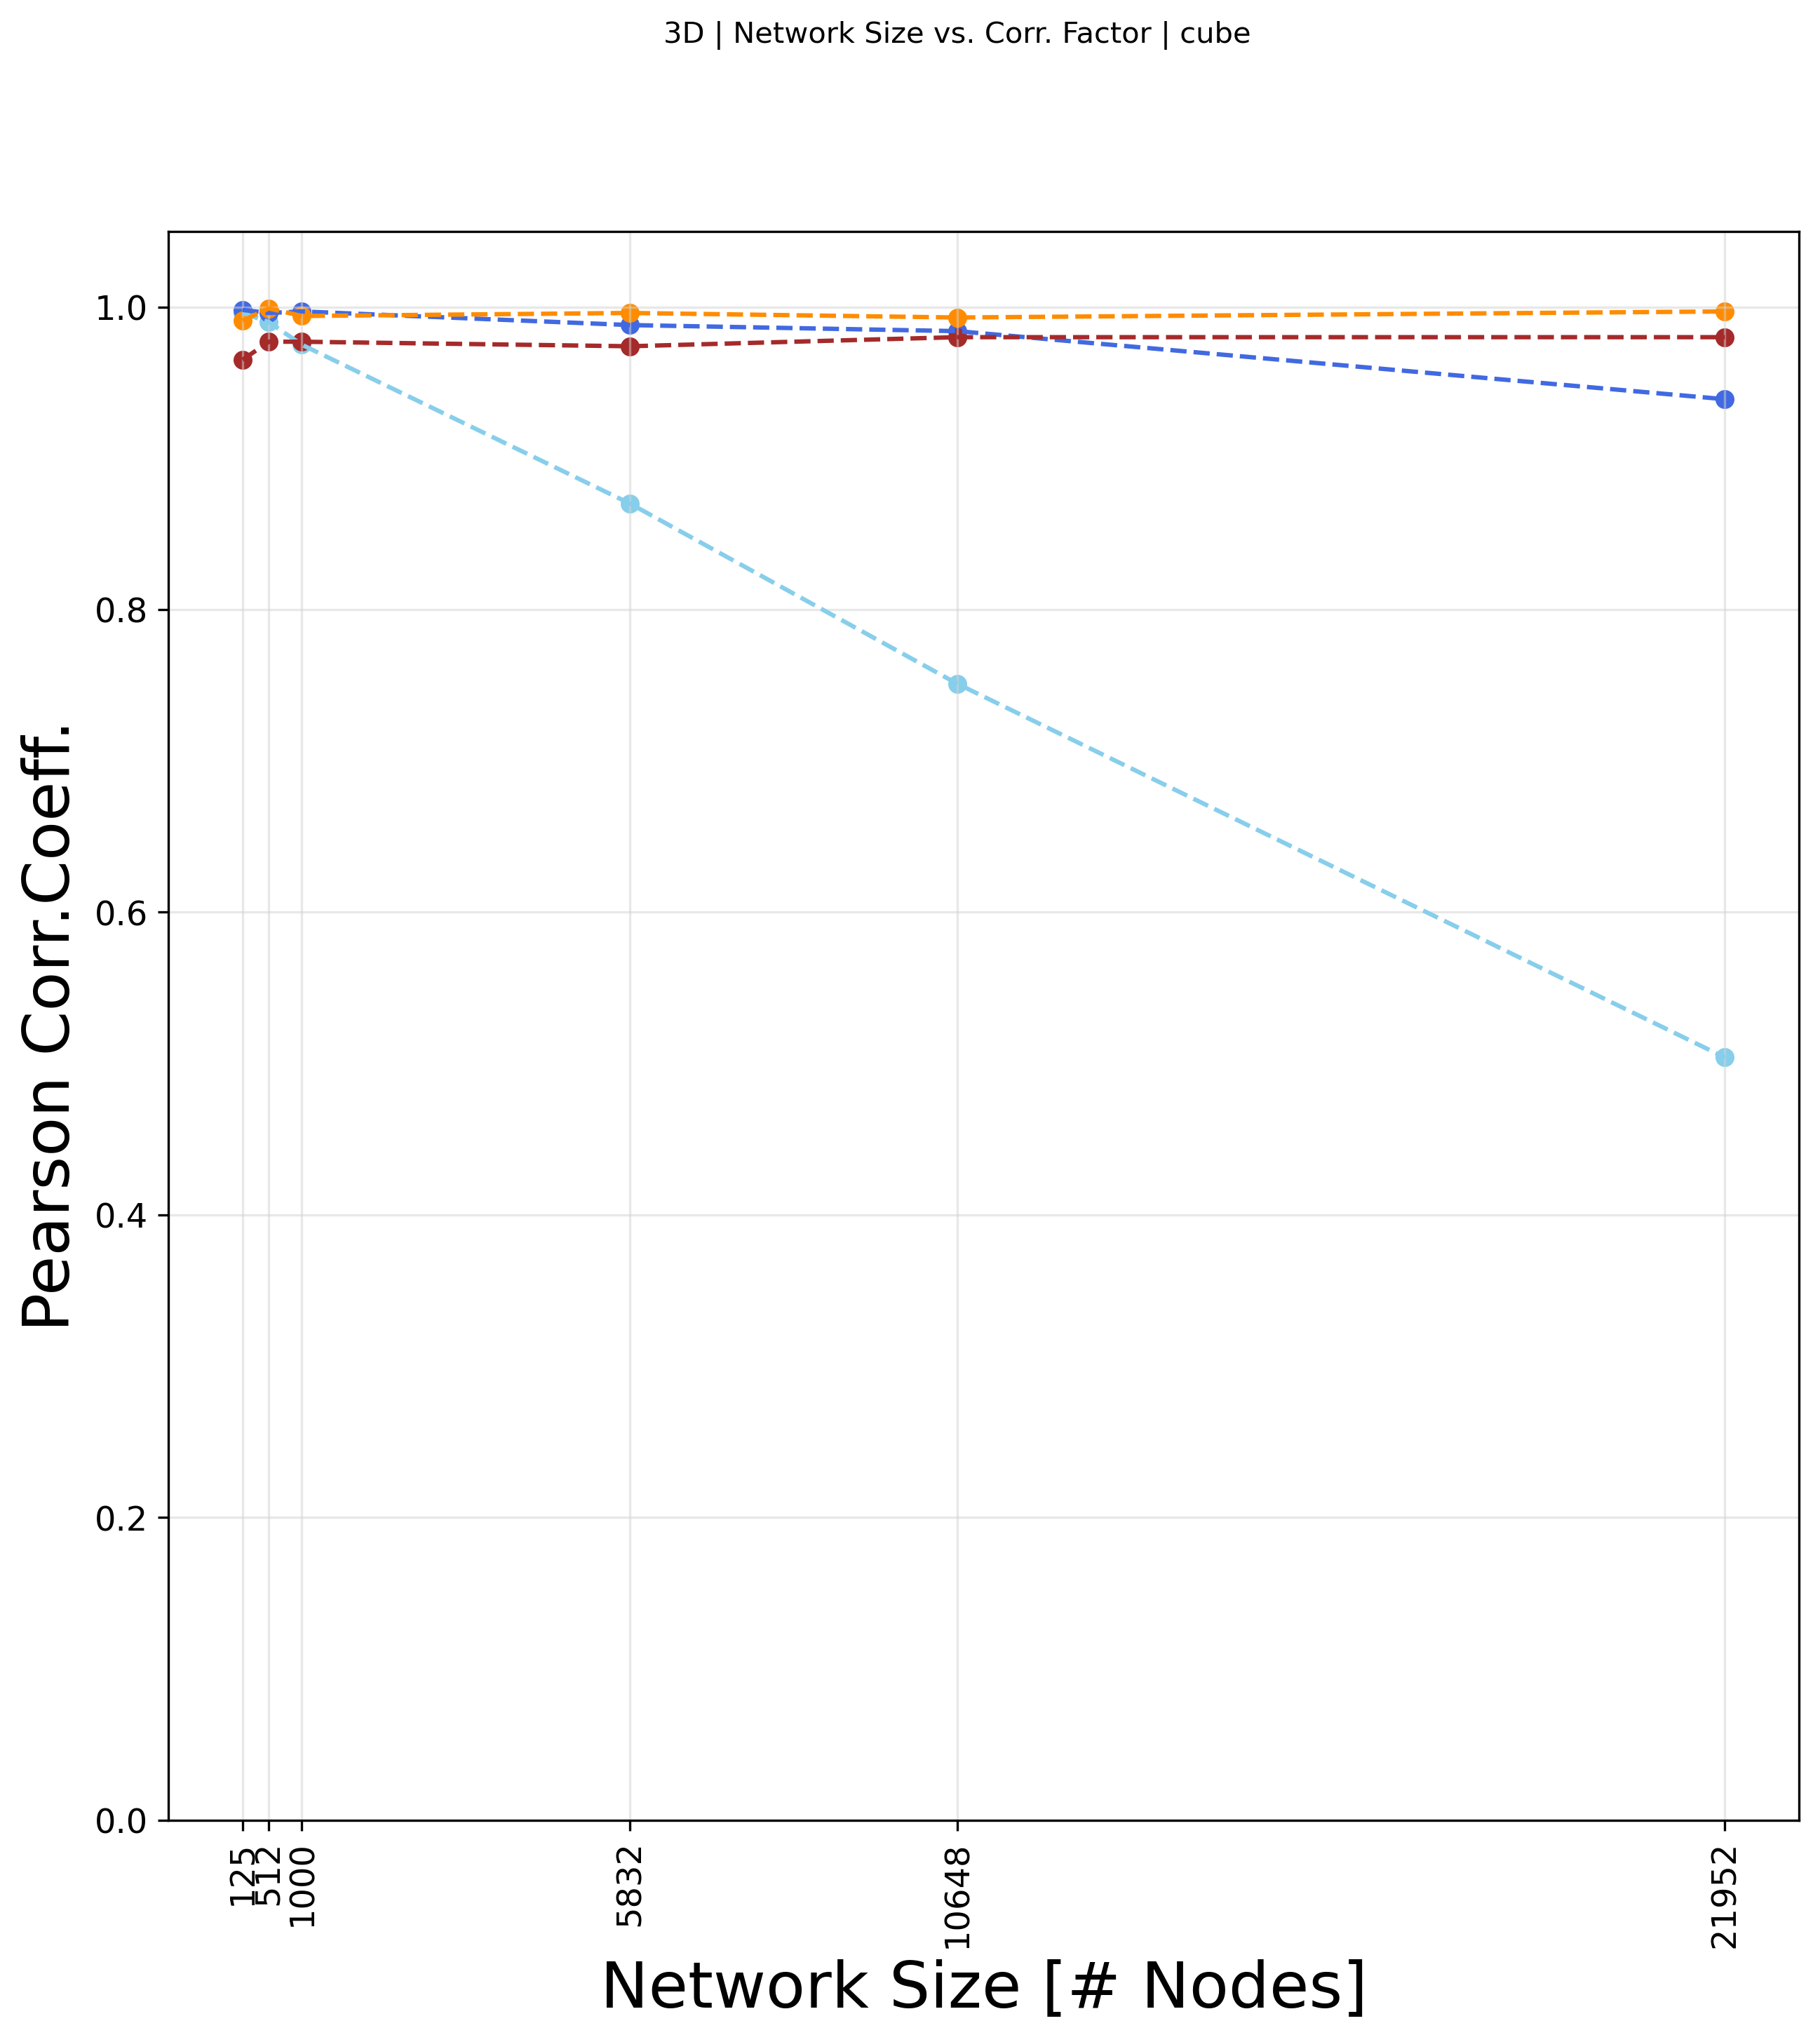

In [25]:
########################################
#
# Network size vs. Correlation Factor 
# with same running time
#
########################################

x_ig = net_sizes # list(d_netsize_time.keys())
y_ig = list(d_netsize_corr_ig.values())

x_nx = net_sizes # list(d_netsize_time.keys())
y_nx = list(d_netsize_corr_nx.values())

x_layout = net_sizes # list(d_netsize_time.keys())
y_layout = list(d_netsize_corr_global.values())

x_nodevec = net_sizes # list(d_netsize_time.keys())
y_nodevec = list(d_netsize_corr_nodevec.values())

fig = plt.figure(figsize=(10,10), dpi=300)
plt.grid(True, c='lightgrey', alpha=0.5)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.suptitle('3D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.05)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.pdf')

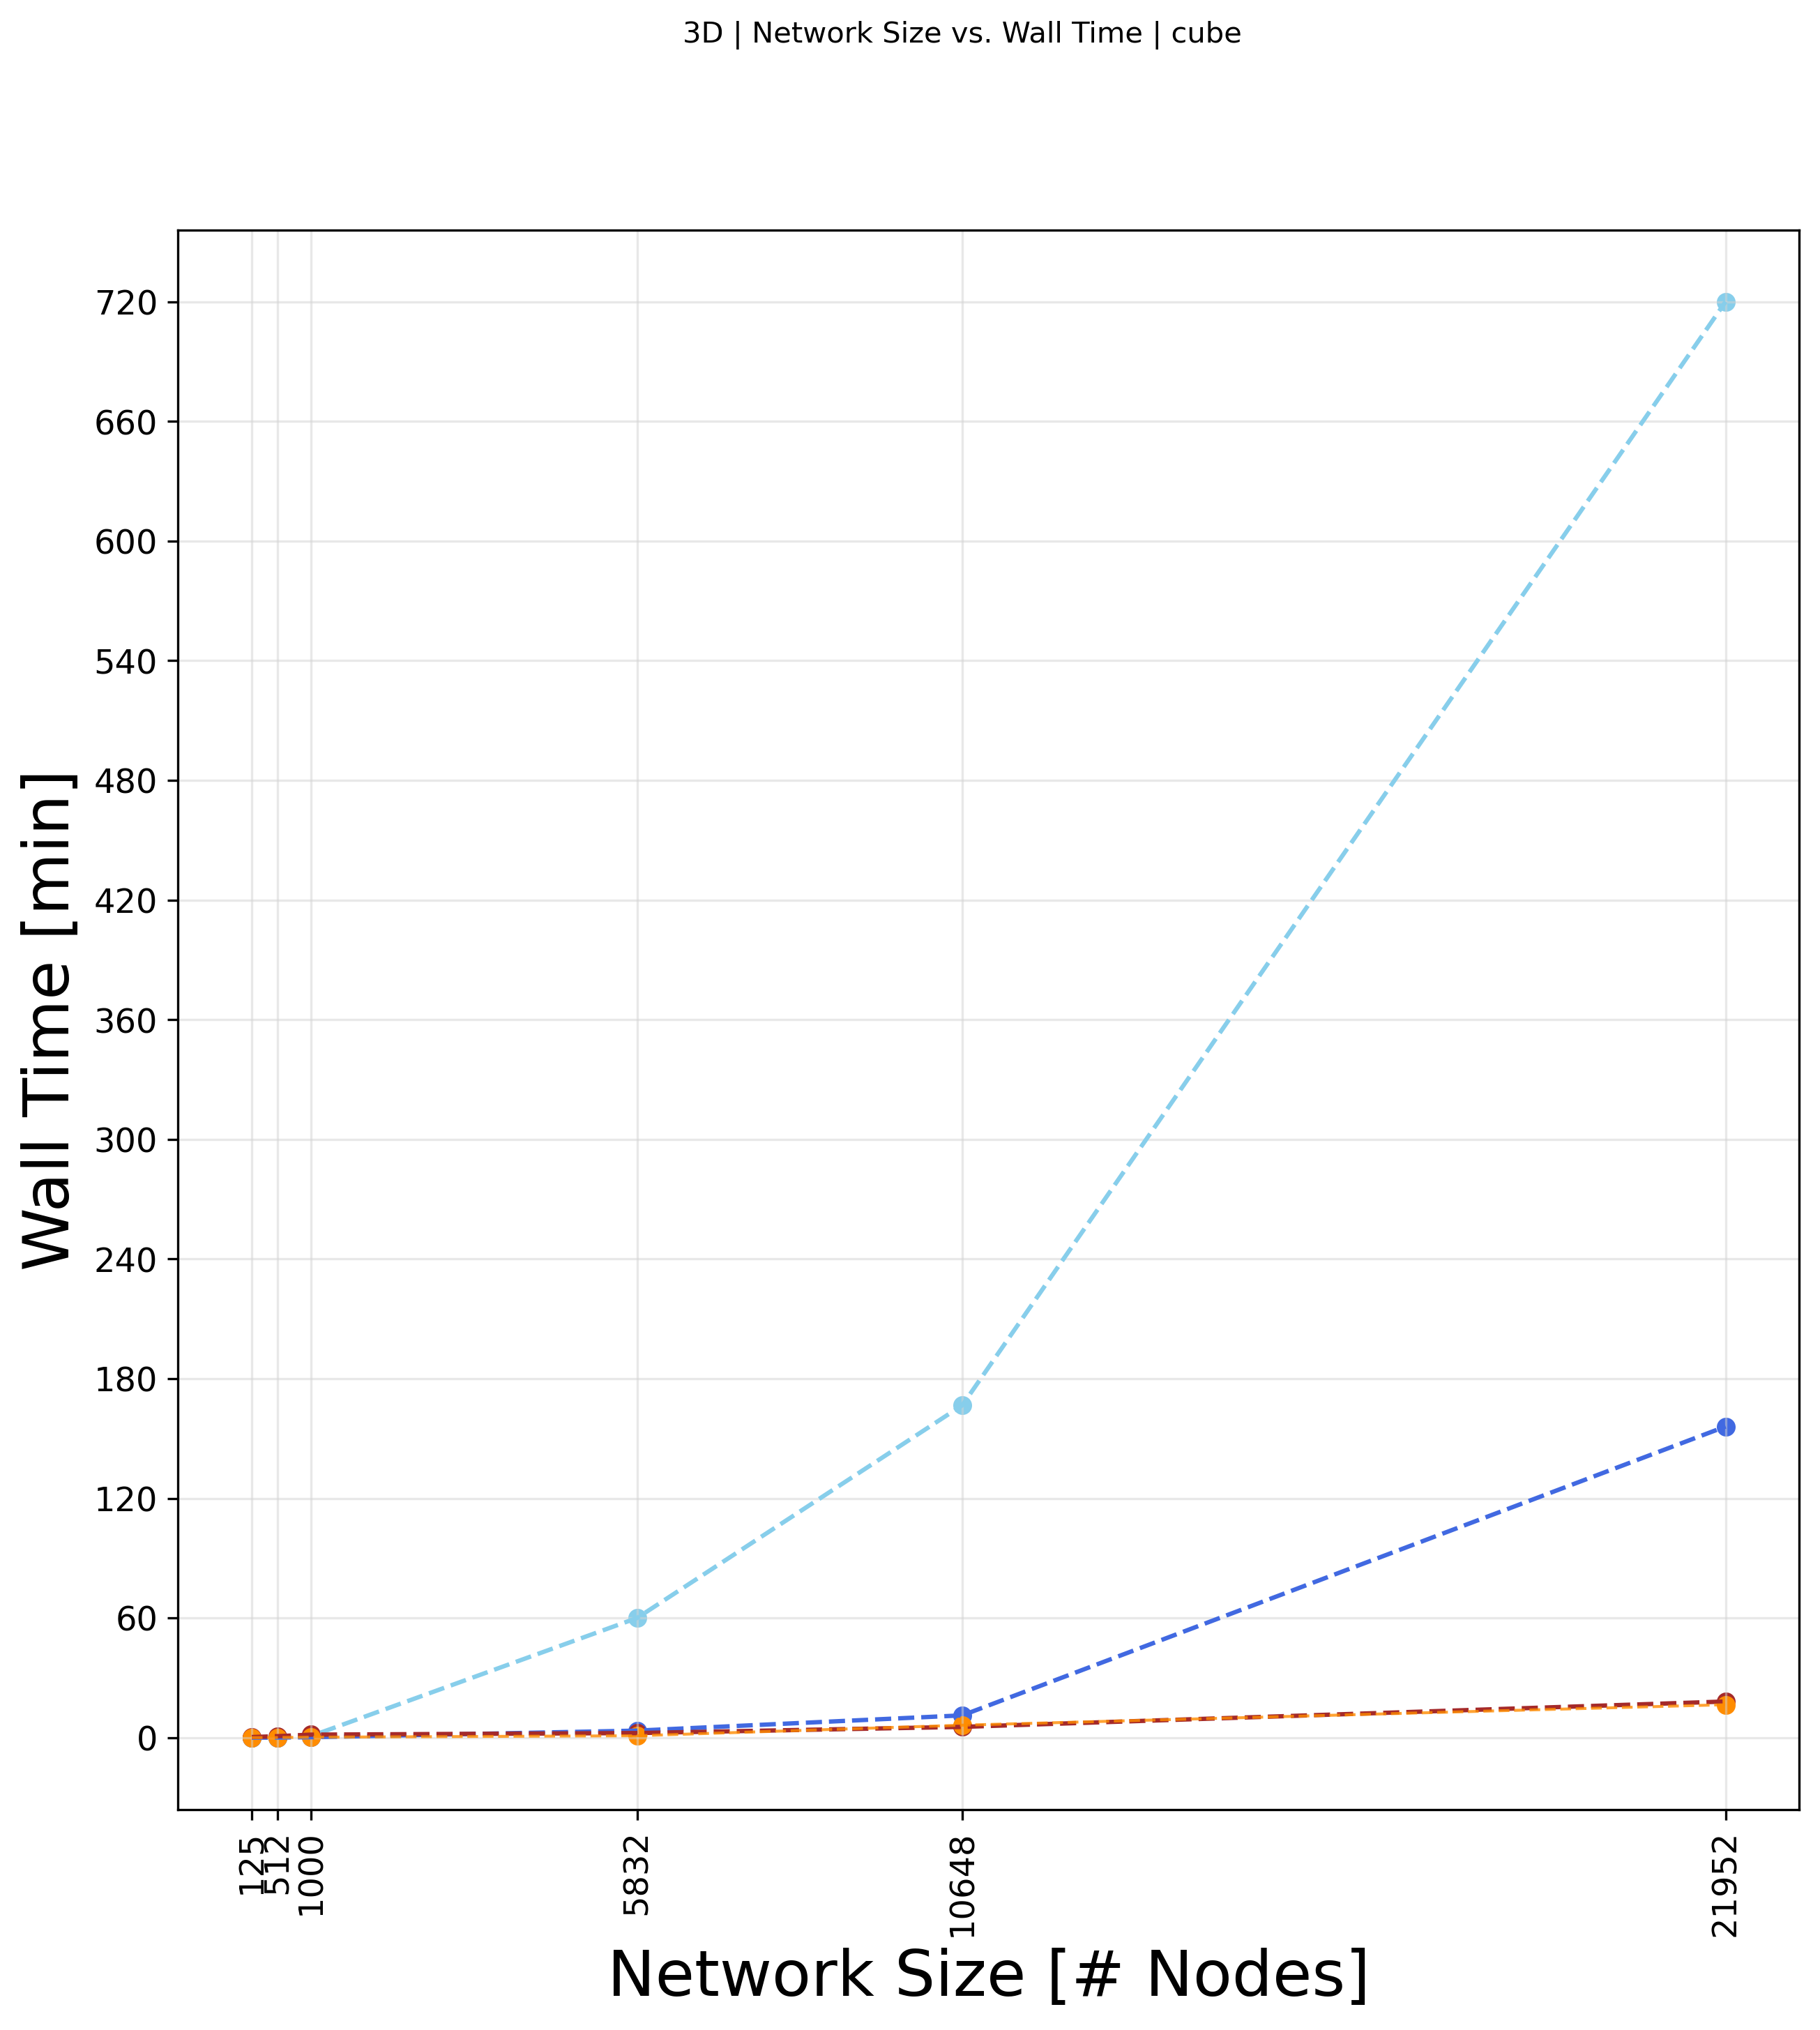

In [24]:
########################################
#
# Network size vs. time
# with same correlation factor
#
########################################

x_nx = net_sizes
y_nx = [(i/60) for i in d_netsize_time_nx.values()]# list(d_netsize_time_spring.values())

x_ig = net_sizes
y_ig = [(i/60) for i in d_netsize_time_ig.values()]# list(d_netsize_time_spring.values())

x_layout = net_sizes 
y_layout = [(i/60) for i in d_netsize_time.values()]

x_nodevec = net_sizes
y_nodevec = [(i/60) for i in d_netsize_time_nodevec.values()]

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.yticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
plt.ylabel("Wall Time [min]", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 0.8, linewidth=1)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Wall Time | '+organism, fontsize=10)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.pdf')